## House Price Prediction
### Group No.     - 12
### EG/2020/4088 - Navoda K.D.L.
### EG/2020/4181  - Samaraweera S.A.D.C.K.
___

#### Importing NumPy, Pandas, Matplotlib, and Seaborn libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading training data from 'train.csv' into data_train and test data from 'test.csv' into data_test

In [3]:
data_train= pd.read_csv('Dataset/train.csv')
data_test= pd.read_csv('Dataset/test.csv')

#### Explanation about the variables:

* beds - Number of bedrooms in property
* baths - Number of bathrooms in property. Note 0.5 corresponds to a half-bath which has a sink and toilet but no tub or shower
* size - Total floor area of property
* size_units - Units of the previous measurement
* lot_size - Total area of the land where the property is located on. The lot belongs to the house owner
* lot_size_units - Units of the previous measurement
* zip_code - Zip code. This is a postal code used in the USA
* price - Price the property was sold for (US dollars)

#### Concatenating data_train and data_test DataFrames to create a combined DataFrame 'data'

In [4]:
frames = [data_train,data_test]
data = pd.concat(frames)

## Exploratory data analysis (EDA)

#### Displaying the first five rows of a DataFrame

In [5]:
data.head(5)

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


#### Displaying the shape (number of rows and columns) of the 'data' DataFrame

In [6]:
data.shape

(2521, 8)

#### Generating descriptive statistics

In [7]:
data.describe()

,beds,baths,size,lot_size,zip_code,price
count,2521.000000,2521.000000,2521.000000,2097.000000,2521.000000,2.521000e+03
mean,2.877033,2.171956,1758.998017,3896.245794,98123.984927,9.668217e+05
std,1.247518,1.004397,921.608036,2714.651578,23.118736,8.870111e+05
min,1.000000,0.500000,250.000000,0.230000,98101.000000,1.590000e+05
25%,2.000000,1.500000,1086.000000,1263.000000,98108.000000,6.050000e+05
50%,3.000000,2.000000,1580.000000,4001.000000,98117.000000,8.130000e+05
75%,4.000000,2.500000,2270.000000,6000.000000,98126.000000,1.115000e+06
max,15.000000,9.000000,11010.000000,9998.000000,98199.000000,2.500000e+07


#### Displaying concise information about the 'data' DataFrame, including data types and non-null counts

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2521 entries, 0 to 504
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2521 non-null   int64  
 1   baths           2521 non-null   float64
 2   size            2521 non-null   float64
 3   size_units      2521 non-null   object 
 4   lot_size        2097 non-null   float64
 5   lot_size_units  2097 non-null   object 
 6   zip_code        2521 non-null   int64  
 7   price           2521 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 177.3+ KB


#### Visualizing histograms for features

c:\Users\Chanmini\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Chanmini\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Chanmini\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Chanmini\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

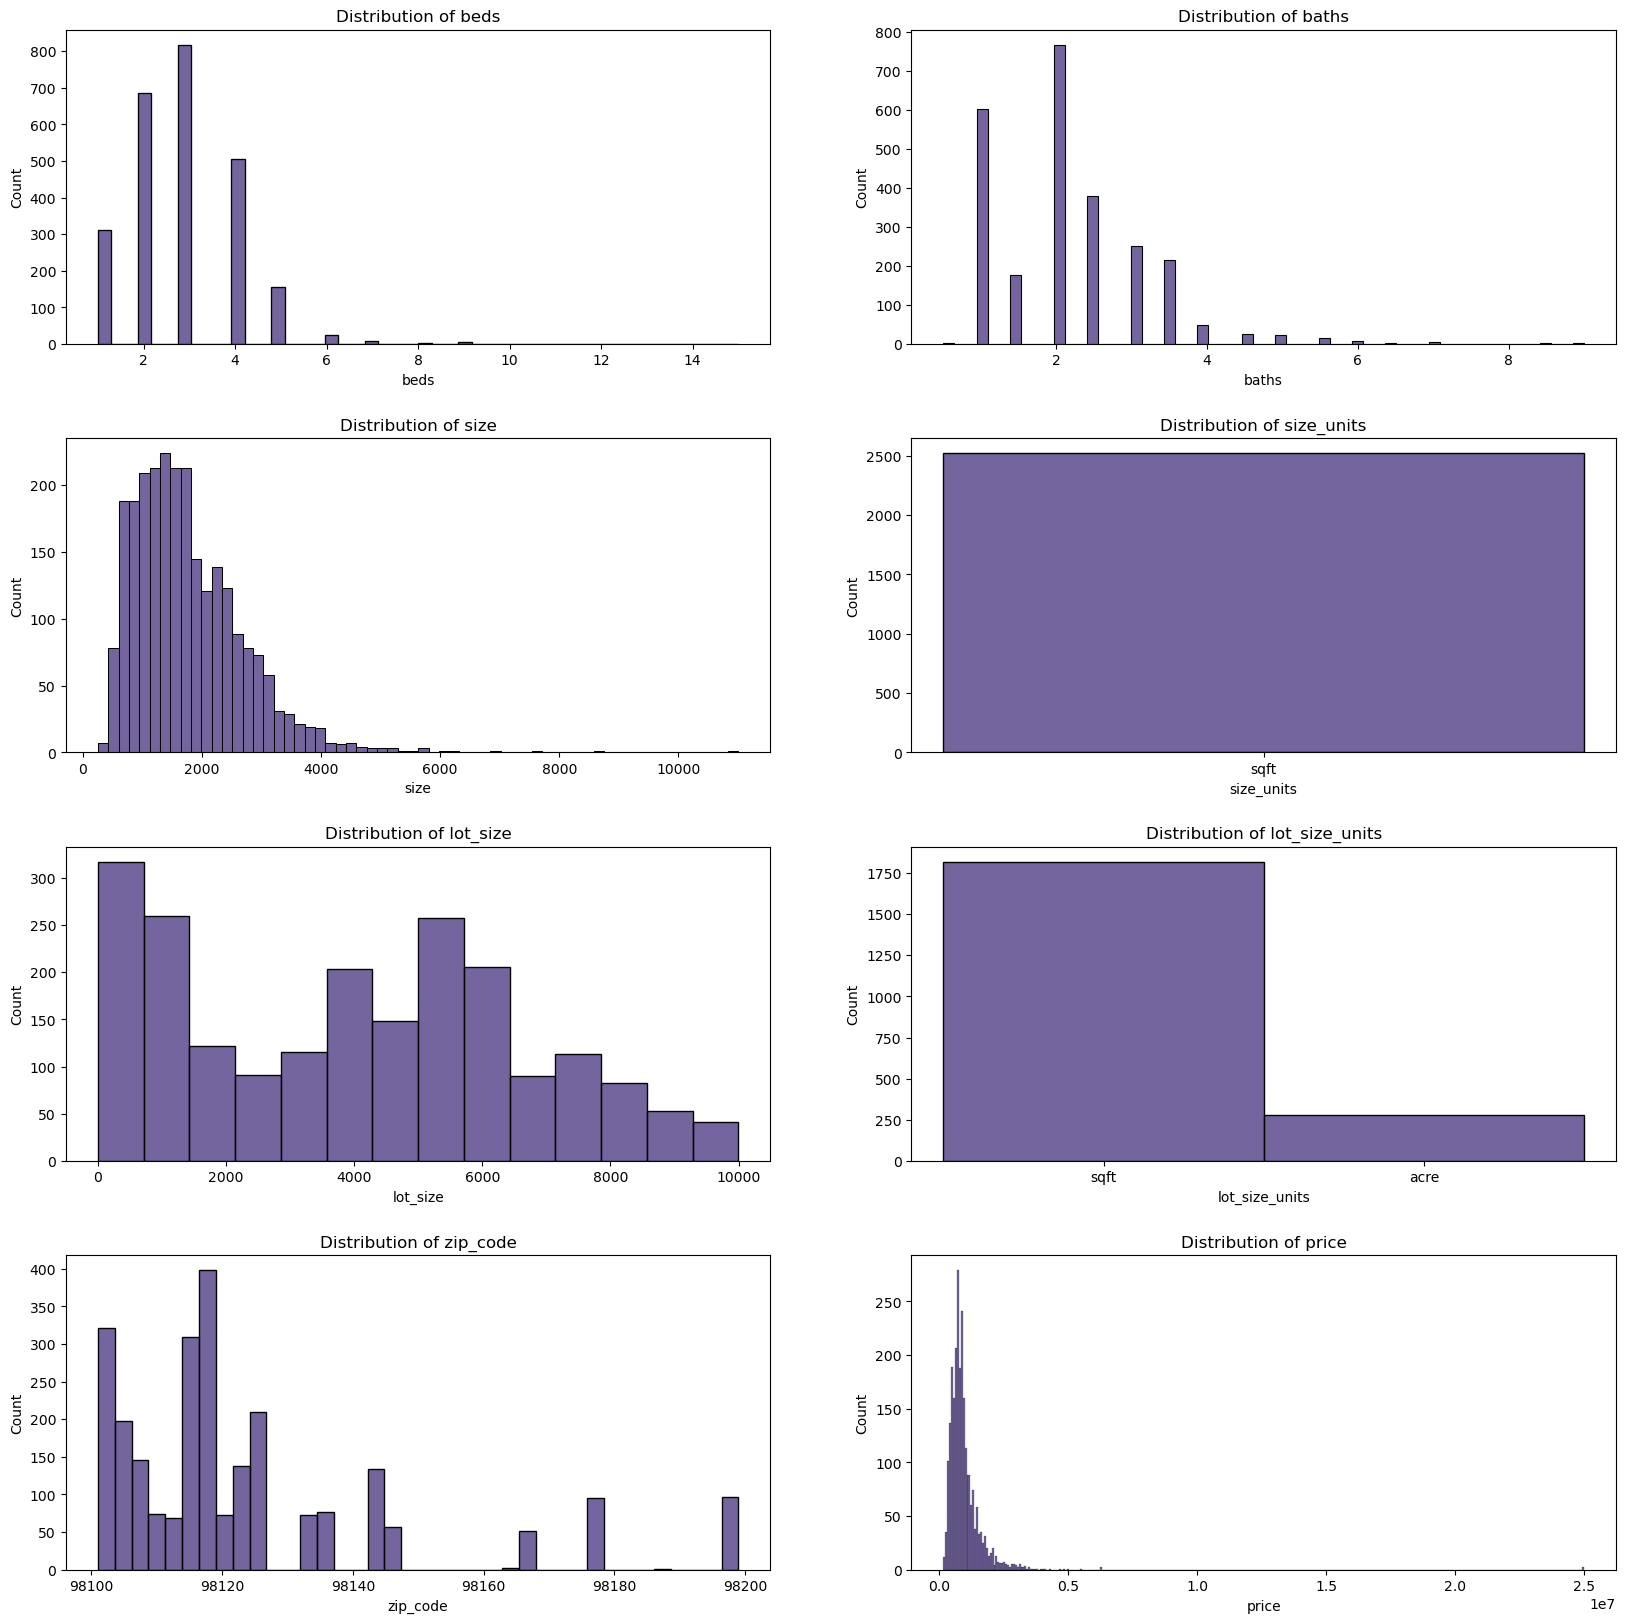

In [9]:
# Set the overall figure size
plt.figure(figsize=(20, 20))

# Choose a vibrant color palette
sns.set_palette("viridis")

# Create subplots for each feature
for i, col in enumerate(['beds', 'baths', 'size', 'size_units', 'lot_size', 'lot_size_units', 'zip_code', 'price']):
    plt.subplot(4, 2, i + 1)
    sns.histplot(data[col], kde=False) 
    plt.title(f'Distribution of {col}')

# Adjust layout for better visualization and increase space between rows
plt.subplots_adjust(hspace=0.3)

# Show the plots
plt.show()

#### Scatterplots for various features against the price

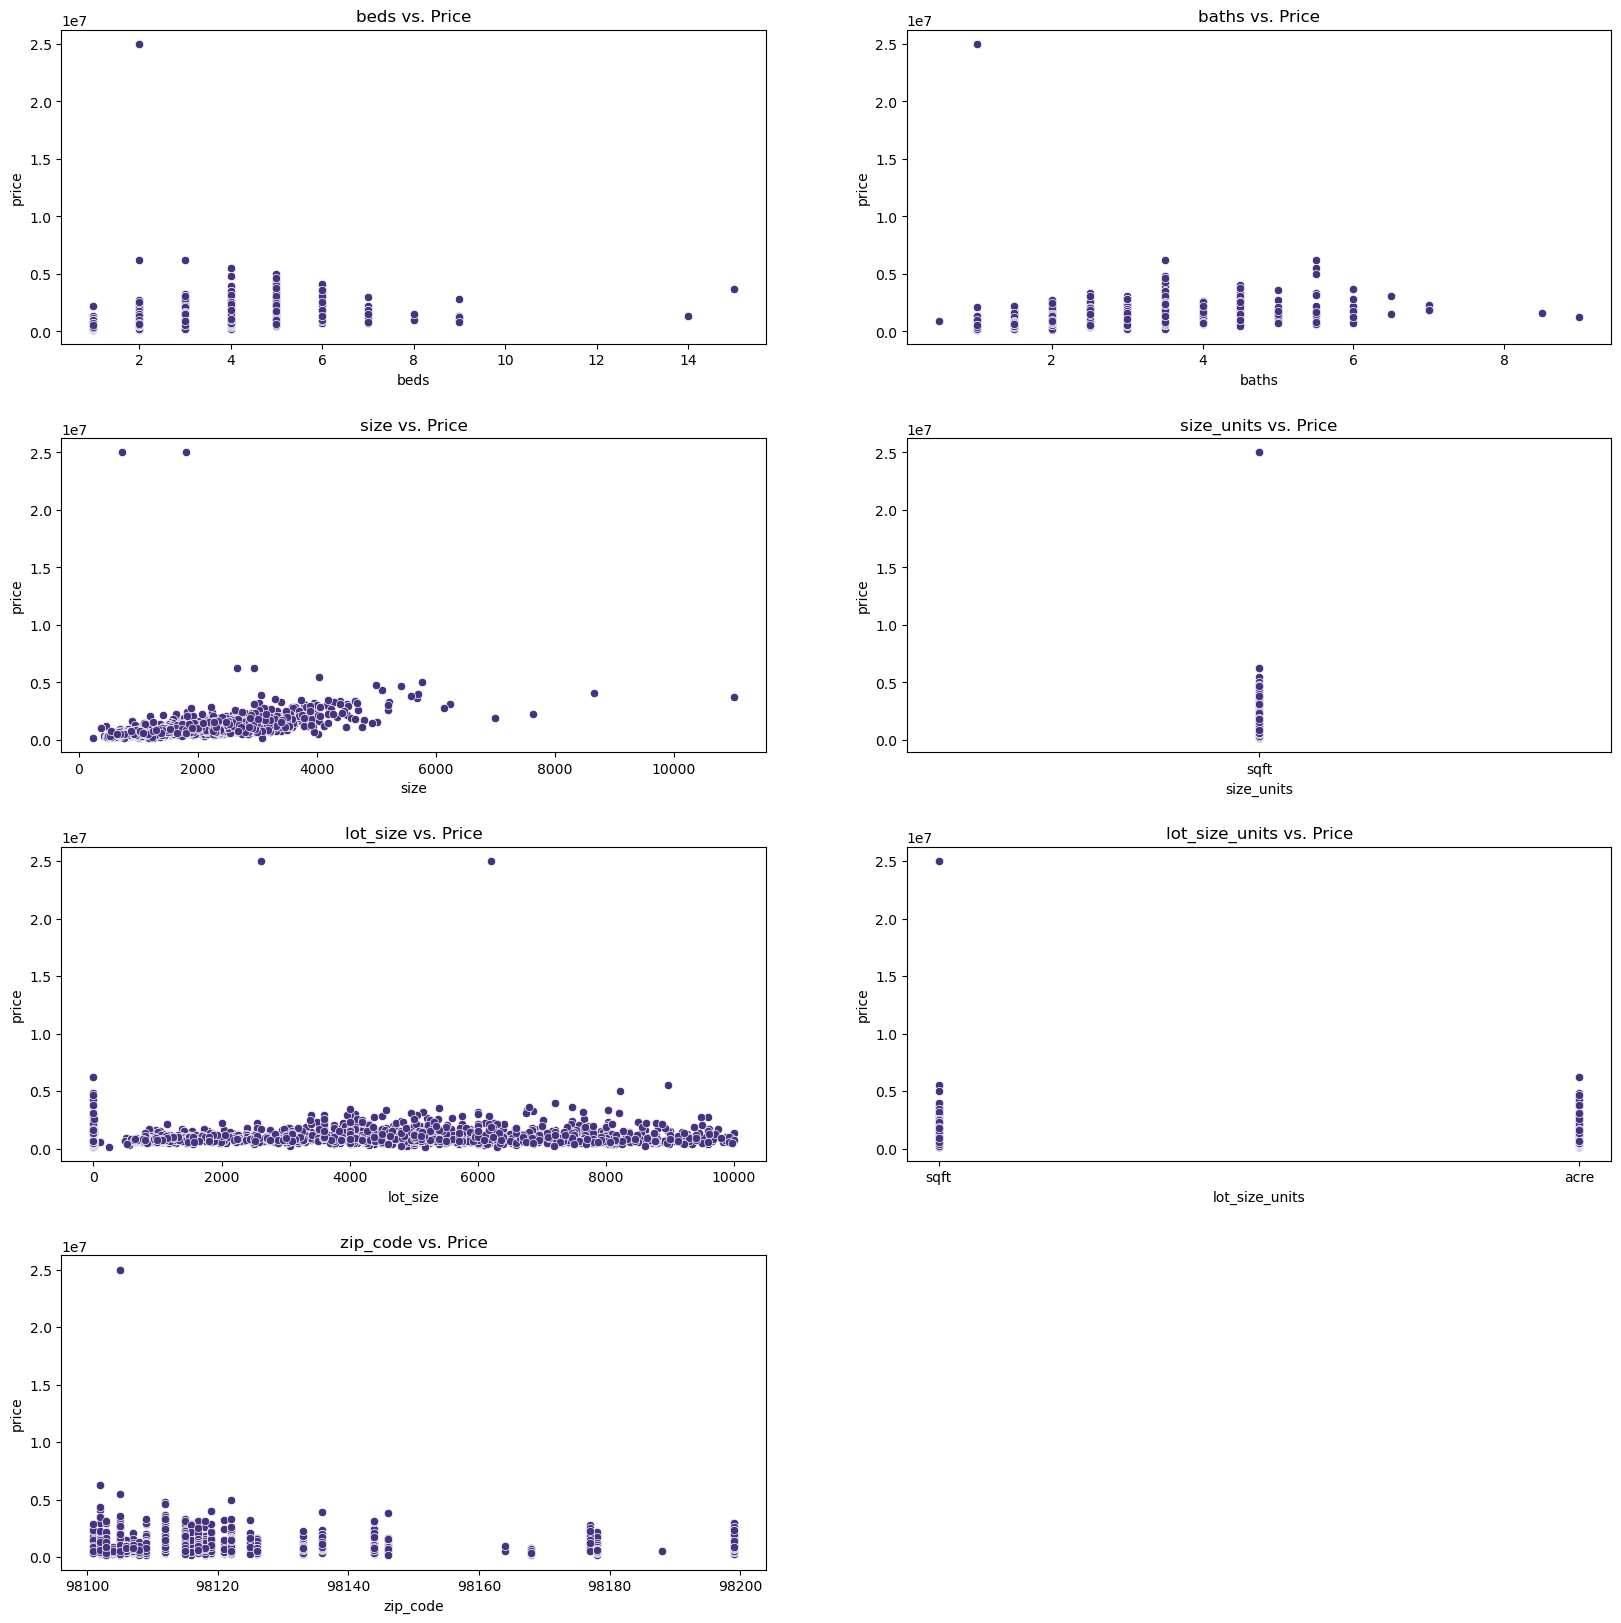

In [10]:
# Set the overall figure size
plt.figure(figsize=(20, 20))

# Choose a vibrant color palette
sns.set_palette("viridis") 

# Create subplots for each feature
for i, col in enumerate(['beds', 'baths', 'size', 'size_units', 'lot_size', 'lot_size_units', 'zip_code']):
    plt.subplot(4, 2, i + 1)
    sns.scatterplot(x=col, y='price', data=data)
    plt.title(f'{col} vs. Price')

# Adjust layout for better visualization and increase space between rows
plt.subplots_adjust(hspace=0.3)

# Show the plots
plt.show()

#### Correlation matrix for the numerical columns

In [12]:
data[['beds', 'baths', 'size', 'lot_size','zip_code', 'price']].corr()

,beds,baths,size,lot_size,zip_code,price
beds,1.000000,0.660099,0.770757,0.279501,0.081527,0.316855
baths,0.660099,1.000000,0.675225,0.031343,0.004700,0.349062
size,0.770757,0.675225,1.000000,0.263893,0.087106,0.476061
lot_size,0.279501,0.031343,0.263893,1.000000,0.148520,0.084253
zip_code,0.081527,0.004700,0.087106,0.148520,1.000000,-0.031812
price,0.316855,0.349062,0.476061,0.084253,-0.031812,1.000000


#### Correlation heatmap

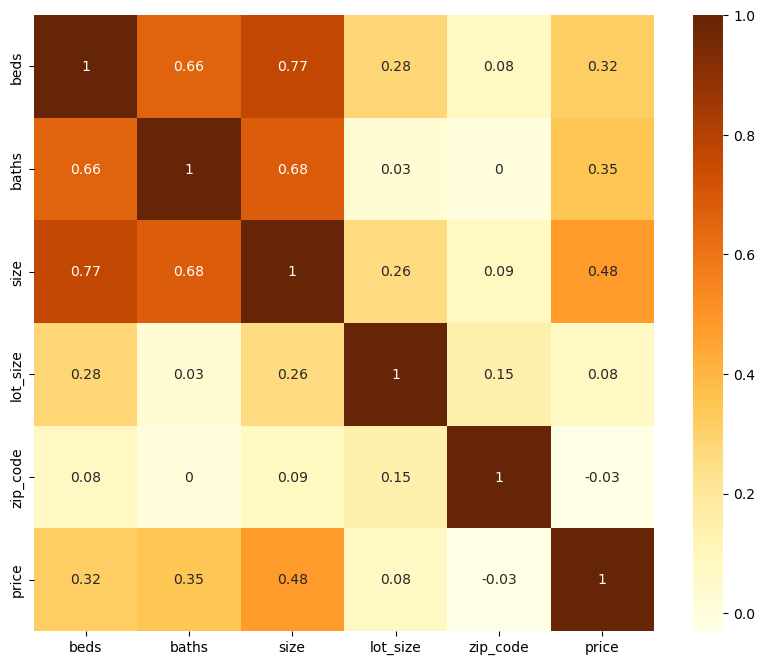

In [13]:
# Calculate the correlation matrix rounded to two decimal places
correl = data[['beds', 'baths', 'size', 'lot_size','zip_code', 'price']].corr().round(2)

# Set up the plot figure with a specific size
plt.figure(figsize=(10, 8))

# Create a heatmap using Seaborn with annotations and a color map
sns.heatmap(correl, annot=True, cmap='YlOrBr')

# Display the heatmap
plt.show()

#### Box plots of various features

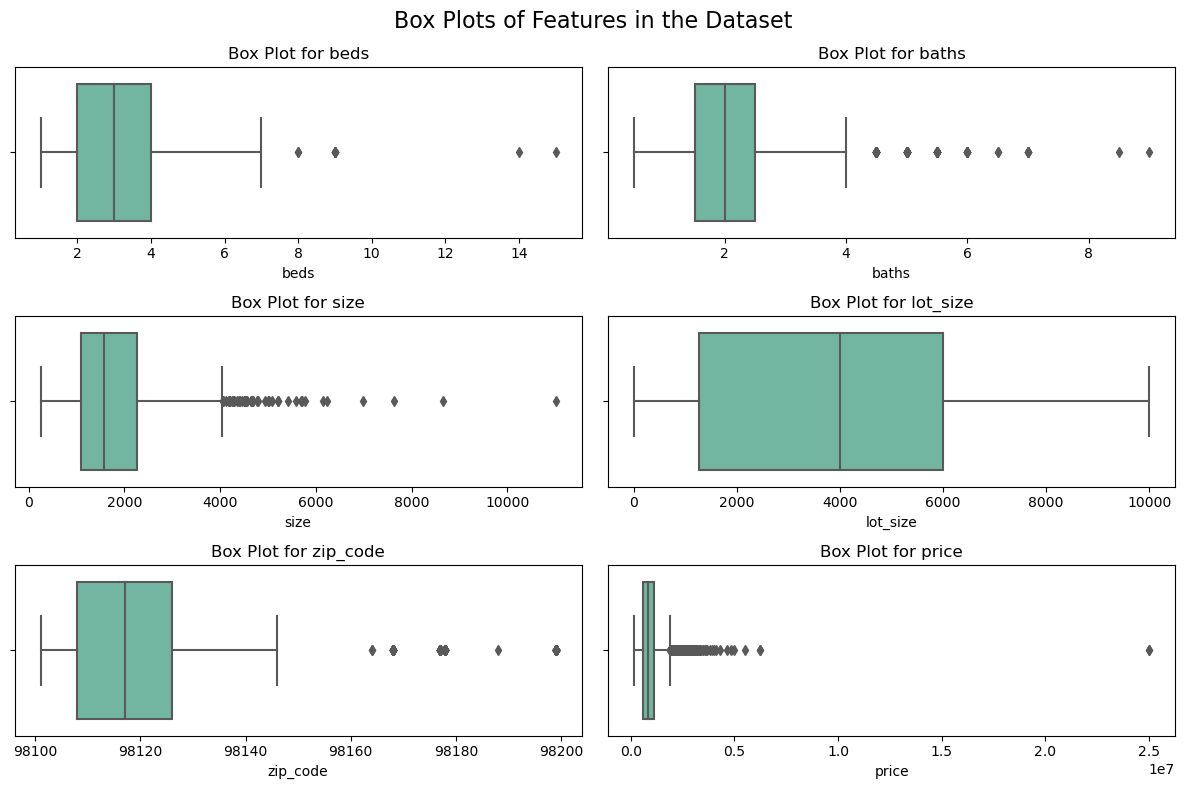

In [14]:
# Get numerical features
numerical_features = data.select_dtypes(include=['number']).columns
num_features = len(numerical_features)

# Set up the figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))

# Add a title for the entire figure
fig.suptitle("Box Plots of Features in the Dataset", fontsize=16)

# Create box plots in each subplot
for i, ax in enumerate(axes.flatten()):
    feature = numerical_features[i]
    sns.boxplot(x=feature, data=data, orient='h', ax=ax, palette='Set2')
    ax.set_title(f'Box Plot for {feature}')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


#### Checking the count of missing values in each column of the 'data' DataFrame


In [15]:
data.isnull().sum()

beds                0
baths               0
size                0
size_units          0
lot_size          424
lot_size_units    424
zip_code            0
price               0
dtype: int64

## Data Preprocessing

#### Showing unique values in the 'lot_size_units' column

In [16]:
data["lot_size_units"].unique()

array(['sqft', 'acre', nan], dtype=object)

#### Creating a new DataFrame 'data_acre' with rows where 'lot_size_units' is equal to "acre"

In [17]:
data_acre=data.loc[data["lot_size_units"]=="acre"]
data_acre

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
5,2,2.0,1190.0,sqft,1.00,acre,98107,740000.0
25,2,1.5,889.0,sqft,0.23,acre,98103,680000.0
33,2,2.0,871.0,sqft,0.29,acre,98119,430000.0
37,5,5.0,2510.0,sqft,0.27,acre,98133,1000000.0
...,...,...,...,...,...,...,...,...
482,4,3.0,2290.0,sqft,0.42,acre,98146,685000.0
484,3,3.0,2480.0,sqft,0.27,acre,98146,1595000.0
498,5,3.5,5420.0,sqft,0.36,acre,98112,4655625.0
500,5,4.5,5580.0,sqft,0.30,acre,98146,3800000.0


#### Converting 'lot_size' from acres to square feet

In [18]:
# Convert lot size to square feet by multiplying with the conversion factor (1 acre = 43560 square feet)
data_acre.loc[:,"lot_size"]=data_acre["lot_size"]*43560

# Replace "acre" in the lot_size_units column with "sqft"
data_acre.loc[:,"lot_size_units"]=data_acre["lot_size_units"].str.replace("acre","sqft")
data_acre

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
1,4,2.0,2240.0,sqft,13503.6,sqft,98106,915000.0
5,2,2.0,1190.0,sqft,43560.0,sqft,98107,740000.0
25,2,1.5,889.0,sqft,10018.8,sqft,98103,680000.0
33,2,2.0,871.0,sqft,12632.4,sqft,98119,430000.0
37,5,5.0,2510.0,sqft,11761.2,sqft,98133,1000000.0
...,...,...,...,...,...,...,...,...
482,4,3.0,2290.0,sqft,18295.2,sqft,98146,685000.0
484,3,3.0,2480.0,sqft,11761.2,sqft,98146,1595000.0
498,5,3.5,5420.0,sqft,15681.6,sqft,98112,4655625.0
500,5,4.5,5580.0,sqft,13068.0,sqft,98146,3800000.0


#### Creating a new DataFrame 'data_sqft' with rows where 'lot_size_units' is equal to "sqft"

In [19]:
data_sqft=data.loc[data["lot_size_units"]=="sqft"]
data_sqft

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.0,sqft,98144,795000.0
2,4,3.0,2040.0,sqft,3783.0,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.0,sqft,98199,1950000.0
6,1,1.0,670.0,sqft,6000.0,sqft,98133,460000.0
7,5,3.5,4510.0,sqft,6000.0,sqft,98105,3150000.0
...,...,...,...,...,...,...,...,...
497,2,2.5,1250.0,sqft,1000.0,sqft,98107,770000.0
499,2,1.5,1088.0,sqft,1807.0,sqft,98117,628000.0
501,3,2.5,1390.0,sqft,1570.0,sqft,98126,575000.0
503,5,5.0,3010.0,sqft,4887.0,sqft,98115,1807000.0


#### Concatenating 'data_sqft' and 'data_acre' DataFrames to create a combined DataFrame 'data_notnull'

In [20]:
frames = [data_sqft,data_acre]
data_notnull = pd.concat(frames)
data_notnull

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.0,sqft,98144,795000.0
2,4,3.0,2040.0,sqft,3783.0,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.0,sqft,98199,1950000.0
6,1,1.0,670.0,sqft,6000.0,sqft,98133,460000.0
7,5,3.5,4510.0,sqft,6000.0,sqft,98105,3150000.0
...,...,...,...,...,...,...,...,...
482,4,3.0,2290.0,sqft,18295.2,sqft,98146,685000.0
484,3,3.0,2480.0,sqft,11761.2,sqft,98146,1595000.0
498,5,3.5,5420.0,sqft,15681.6,sqft,98112,4655625.0
500,5,4.5,5580.0,sqft,13068.0,sqft,98146,3800000.0


#### Creating a new DataFrame 'data_null' with rows where 'lot_size_units' is neither "acre" nor "sqft"

In [21]:
data_null=data.loc[(data["lot_size_units"]!="acre") & (data["lot_size_units"]!="sqft")]
data_null

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0
15,2,1.5,900.0,sqft,NaN,NaN,98133,549755.0
16,3,3.5,1360.0,sqft,NaN,NaN,98103,700000.0
17,1,1.0,550.0,sqft,NaN,NaN,98122,330000.0
26,1,1.0,508.0,sqft,NaN,NaN,98109,325000.0
...,...,...,...,...,...,...,...,...
432,2,1.5,755.0,sqft,NaN,NaN,98101,500000.0
433,1,1.0,764.0,sqft,NaN,NaN,98105,510000.0
459,1,1.0,692.0,sqft,NaN,NaN,98122,499950.0
464,1,1.0,547.0,sqft,NaN,NaN,98125,264000.0


### Imputation

#### Filling missing values in 'lot_size' of 'data_null' with the mean of 'lot_size' from 'data_notnull'

In [22]:
data_null.loc[:, "lot_size"]=data_null["lot_size"].fillna(data_notnull["lot_size"].mean())

#### Filling missing values in 'lot_size_units' of 'data_null' with "sqft"

In [23]:
data_null.loc[:, "lot_size_units"]=data_null["lot_size_units"].fillna("sqft")
data_null

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
4,2,2.0,1042.0,sqft,16783.852074,sqft,98102,950000.0
15,2,1.5,900.0,sqft,16783.852074,sqft,98133,549755.0
16,3,3.5,1360.0,sqft,16783.852074,sqft,98103,700000.0
17,1,1.0,550.0,sqft,16783.852074,sqft,98122,330000.0
26,1,1.0,508.0,sqft,16783.852074,sqft,98109,325000.0
...,...,...,...,...,...,...,...,...
432,2,1.5,755.0,sqft,16783.852074,sqft,98101,500000.0
433,1,1.0,764.0,sqft,16783.852074,sqft,98105,510000.0
459,1,1.0,692.0,sqft,16783.852074,sqft,98122,499950.0
464,1,1.0,547.0,sqft,16783.852074,sqft,98125,264000.0


#### Concatenating 'data_notnull' and 'data_null' DataFrames to create a combined DataFrame 'data'

In [24]:
frames = [data_notnull,data_null]
data = pd.concat(frames)
data

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.000000,sqft,98144,795000.0
2,4,3.0,2040.0,sqft,3783.000000,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.000000,sqft,98199,1950000.0
6,1,1.0,670.0,sqft,6000.000000,sqft,98133,460000.0
7,5,3.5,4510.0,sqft,6000.000000,sqft,98105,3150000.0
...,...,...,...,...,...,...,...,...
432,2,1.5,755.0,sqft,16783.852074,sqft,98101,500000.0
433,1,1.0,764.0,sqft,16783.852074,sqft,98105,510000.0
459,1,1.0,692.0,sqft,16783.852074,sqft,98122,499950.0
464,1,1.0,547.0,sqft,16783.852074,sqft,98125,264000.0


#### Checking the count of missing values in each column of the 'data' DataFrame

In [25]:
data.isnull().sum()

beds              0
baths             0
size              0
size_units        0
lot_size          0
lot_size_units    0
zip_code          0
price             0
dtype: int64

#### Displaying the shape (number of rows and columns) of the 'data' DataFrame

In [26]:
data.shape

(2521, 8)

#### Checking unique values of 'zip_code'

In [27]:
data["zip_code"].unique()

array([98144, 98107, 98199, 98133, 98105, 98108, 98178, 98103, 98177,
       98115, 98119, 98117, 98116, 98146, 98125, 98126, 98118, 98112,
       98106, 98136, 98122, 98109, 98102, 98168, 98104, 98121, 98101,
       98188, 98164], dtype=int64)

#### Converting zip_code to a categorical variable

In [28]:
data.loc[:, 'zip_code'] = data['zip_code'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2521 entries, 0 to 495
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   beds            2521 non-null   int64   
 1   baths           2521 non-null   float64 
 2   size            2521 non-null   float64 
 3   size_units      2521 non-null   object  
 4   lot_size        2521 non-null   float64 
 5   lot_size_units  2521 non-null   object  
 6   zip_code        2521 non-null   category
 7   price           2521 non-null   float64 
dtypes: category(1), float64(4), int64(1), object(2)
memory usage: 161.3+ KB


#### Deleting the 'size_units' and 'lot_size_units' variable, since they have only one value.

In [29]:
data["size_units"].unique()

array(['sqft'], dtype=object)

In [30]:
data["lot_size_units"].unique()

array(['sqft'], dtype=object)

In [31]:
data = data.drop(['size_units','lot_size_units'], axis = 1)
data

,beds,baths,size,lot_size,zip_code,price
0,3,2.5,2590.0,6000.000000,98144,795000.0
2,4,3.0,2040.0,3783.000000,98107,950000.0
3,4,3.0,3800.0,5175.000000,98199,1950000.0
6,1,1.0,670.0,6000.000000,98133,460000.0
7,5,3.5,4510.0,6000.000000,98105,3150000.0
...,...,...,...,...,...,...
432,2,1.5,755.0,16783.852074,98101,500000.0
433,1,1.0,764.0,16783.852074,98105,510000.0
459,1,1.0,692.0,16783.852074,98122,499950.0
464,1,1.0,547.0,16783.852074,98125,264000.0


#### Removing Extreme Outliers

In [32]:
numeric_data = data.select_dtypes(include=['number'])  # Select only numeric columns

# Calculate the IQR for each numeric column
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Create a mask for outliers
outliers_mask = (numeric_data < lower_bound) | (numeric_data > upper_bound)

# Display columns with outliers
columns_with_outliers = numeric_data.columns[outliers_mask.any()]
print(f'Columns with outliers: {columns_with_outliers}')

# Count the number of outliers in each column
num_outliers_per_column = outliers_mask.sum()
print('Number of outliers in each column:')
print(num_outliers_per_column)

# Display the total number of outliers in the entire dataset
total_outliers = num_outliers_per_column.sum()
print(f'Total number of outliers: {total_outliers}')

Columns with outliers: Index(['beds', 'baths', 'size', 'lot_size', 'price'], dtype='object')
Number of outliers in each column:
beds         2
baths       17
size         6
lot_size    90
price       53
dtype: int64
Total number of outliers: 168


In [33]:
# Remove rows with outliers
data = data[~outliers_mask.any(axis=1)]

#### Box Plots after removing extreme outliers

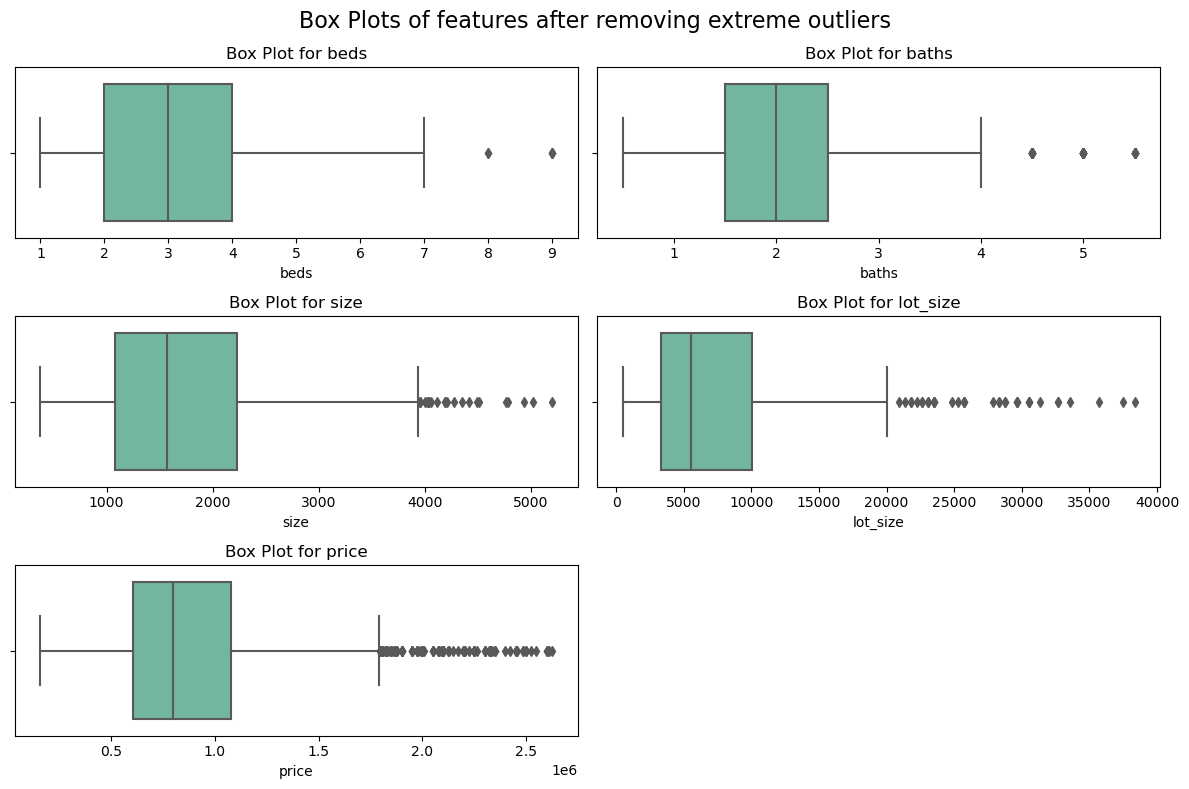

In [35]:
# Get numerical features
numerical_features = data.select_dtypes(include=['number']).columns
num_features = len(numerical_features)

# Adjust subplot layout to match the number of features
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))

# Add a title for the entire figure
fig.suptitle("Box Plots of features after removing extreme outliers", fontsize=16)

# Create box plots in each subplot
for i, ax in enumerate(axes.flatten()):
    if i < num_features:  # Ensure we don't exceed the number of features
        feature = numerical_features[i]
        sns.boxplot(x=feature, data=data, orient='h', ax=ax, palette='Set2')
        ax.set_title(f'Box Plot for {feature}')
    else:
        # Remove extra subplots if needed
        axes.flatten()[i].axis('off')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

#### Importing necessary modules from scikit-learn for machine learning tasks

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import PredictionErrorDisplay

#### Splitting the dataset into training and testing sets

In [37]:
# Separate features (X) and target variable (y)
X = data.drop('price', axis=1)  # Features (independent variables)
y = data['price']  # Target variable (dependent variable)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# - X_train: Features for training
# - X_test: Features for testing
# - y_train: Target variable for training
# - y_test: Target variable for testing
# - test_size=0.2: Specifies that 20% of the data will be used for testing
# - random_state=42: Sets a random seed for reproducibility


#### Scaling the features of the training and testing datasets 

In [38]:
scaler = StandardScaler()               # Initialize the scaler
X_train = scaler.fit_transform(X_train) # Fit the scaler on the training data and transform it
X_test = scaler.transform(X_test)       # Use the same scaler to transform the test data
X_train

array([[-1.59927557, -1.23599734, -1.24899171,  1.52198033, -0.39486781],
       [-1.59927557, -1.23599734, -1.25023903,  1.7007685 , -0.22169984],
       [-0.71992963, -0.12506766, -1.01823767, -1.09512985, -0.35157581],
       ...,
       [ 0.15941631, -0.12506766,  0.74422432, -0.26662811,  3.24165943],
       [-0.71992963, -1.23599734, -0.88851647, -0.46972322, -0.69791174],
       [ 0.15941631, -0.6805325 ,  0.57084696, -0.42318752, -0.30828382]])

#### Displaying the shape (number of rows and columns) of the training data

In [39]:
X_train.shape, y_train.shape

((1892, 5), (1892,))

#### Displaying the shape (number of rows and columns) of the testing data

In [40]:
X_test.shape, y_test.shape

((473, 5), (473,))

---

## Decision Tree Model

#### Training a Decision Tree model and making predictions

In [60]:
dt_model = DecisionTreeClassifier() # Initialize a Decision Tree classifier
dt_model.fit(X_train, y_train)      # Train the Decision Tree model on the training data
dt_pred = dt_model.predict(X_test)  # Make predictions on the test data
print(dt_pred[:5])                  # Display the first 5 rows of predicted values

[660000. 769950. 884950. 660000. 974898.]


### Assessing the Decision Tree Model Peformance

#### Mean Absolute Error

In [61]:
mae = mean_absolute_error(y_test, dt_pred)  # Calculate Mean Absolute Error (MAE)
print(f"Mean Absolute Error: {mae}")        # Print the calculated MAE

Mean Absolute Error: 233389.66384778012


#### Root Mean Squared Error (RMSE)

In [62]:
mse = mean_squared_error(y_test, dt_pred)          # Calculate Mean Squared Error (MSE)
rmse = np.sqrt(mse)                                # Calculate Root Mean Squared Error (RMSE)
print(f"Root Mean Squared Error (RMSE): {rmse}")   # Print the RMSE

Root Mean Squared Error (RMSE): 349339.36901918304


#### Correlation Coefficient

In [63]:
correlation = np.corrcoef(y_test, dt_pred)[0, 1]                 # Calculate the correlation coefficient between y_test and dt_pred
print(f'Correlation between y_test and y_pred: {correlation}')   # Print the calculated correlation coefficient

Correlation between y_test and y_pred: 0.6293419014233077


#### Residual plot

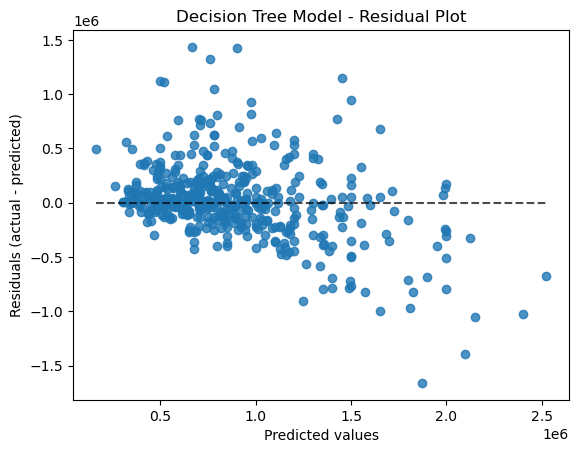

In [64]:
display = PredictionErrorDisplay(y_true=y_test, y_pred=dt_pred) # Create a PredictionErrorDisplay object with true values (y_test) and predicted values (dt_pred)
display.plot()                                                  # Plot the prediction errors
plt.title('Decision Tree Model - Residual Plot')                # Add a title to the plot
plt.show()                                                      # Show the plot

---

## Linear Regression Model

#### Training a Linear Regression model and making predictions

In [65]:
lr_model = LinearRegression()       # Initialize a Linear Regression model
lr_model.fit(X_train, y_train)      # Train the Linear Regression model on the training data
lr_pred =lr_model.predict(X_test)   # Make predictions on the test data
print(lr_pred[:5])                  # Display the first 5 rows of predicted values

[ 640813.4942535   756304.33264948  777058.57968873  500185.9429212
 1113209.66078247]


### Assessing the Linear Regression Model Peformance

####  Mean Absolute Error

In [69]:
mae = mean_absolute_error(y_test, lr_pred)  # Calculate Mean Absolute Error (MAE)
print(f"Mean Absolute Error: {mae}")        # Print the calculated MAE

Mean Absolute Error: 202381.6794045849


#### Root Mean Squared Error (RMSE)

In [70]:
mse = mean_squared_error(y_test, lr_pred)          # Calculate Mean Squared Error (MSE)
rmse = np.sqrt(mse)                                # Calculate Root Mean Squared Error (RMSE)
print(f"Root Mean Squared Error (RMSE): {rmse}")   # Print the RMSE

Root Mean Squared Error (RMSE): 283303.5129895811


#### Correlation Coefficient

In [71]:
correlation = np.corrcoef(y_test, lr_pred)[0, 1]                # Calculate the correlation coefficient between y_test and lr_pred
print(f'Correlation between y_test and y_pred: {correlation}')  # Print the calculated correlation coefficient

Correlation between y_test and y_pred: 0.7281901786085543


#### Residual plot

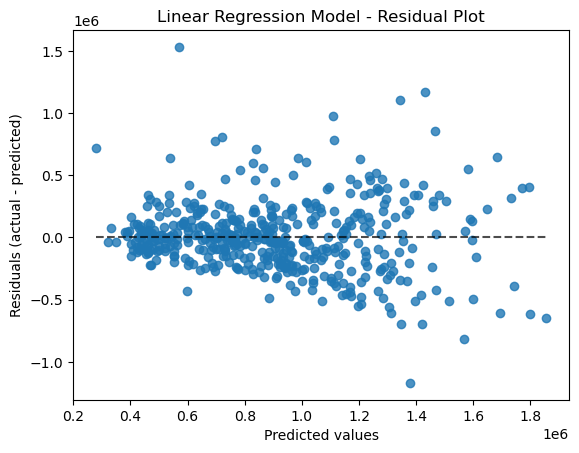

In [72]:
display = PredictionErrorDisplay(y_true=y_test, y_pred=lr_pred) # Create a PredictionErrorDisplay object with true values (y_test) and predicted values (lr_pred)
display.plot()                                                  # Plot the prediction errors
plt.title('Linear Regression Model - Residual Plot')            # Add a title to the plot
plt.show()                                                      # Show the plot